In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import compute_training_mean, compute_training_standard_deviation, z_score_scaling, gradient_descent, compute_cost, compute_gradient, compute_predictions, compute_r_squared

In [2]:
df = pd.read_csv("house_price_regression_dataset.csv")

The first step is to split our data set into 2 subsets. The first is a marjority subset that we will use for training our model. The second subset is used for testing our model after training. We will also remove the targets from both data sets and store them in seperate arrays.

In [3]:
train_df = df.sample(frac=0.8,random_state=200)
test_df = df.drop(train_df.index)

training_targets = train_df.pop("House_Price").values
actual_targets = test_df.pop("House_Price").values

It is important to scale data **AFTER** splitting. We also scale the data using only data from the training data as using information from the testing data before training can create bias in the eventual evalution using this same data. 

**NOTE** that both the training and testing data sets must be scaled with the scaling parameters from the training data. We do **NOT** recalculate scaling parameters for each subset of the data.

In [4]:
for column in train_df:
    print(f"Range of {column} is ({train_df[column].min()}, {train_df[column].max()})")

Range of Square_Footage is (503, 4999)
Range of Num_Bedrooms is (1, 5)
Range of Num_Bathrooms is (1, 3)
Range of Year_Built is (1950, 2022)
Range of Lot_Size is (0.5060582193045366, 4.989302700131234)
Range of Garage_Size is (0, 2)
Range of Neighborhood_Quality is (1, 10)


Given these ranges we see that we will have to preform some feature scaling to ensure the gradient descent runs smoothly and quickly. 

In [5]:
training_mean = compute_training_mean(train_df)
training_standard_deviation = compute_training_standard_deviation(train_df)
train_df_scaled = z_score_scaling(train_df, training_standard_deviation ,training_mean)


for column in train_df:
    print(f"Range of {column} after z score scaling is ({train_df_scaled[column].min()}, {train_df_scaled[column].max()})")

Range of Square_Footage after z score scaling is (-1.8381585643079557, 1.769295192711821)
Range of Num_Bedrooms after z score scaling is (-1.4019409298128198, 1.4089682026439616)
Range of Num_Bathrooms after z score scaling is (-1.2062795223773068, 1.2153606731103854)
Range of Year_Built after z score scaling is (-1.793675477718371, 1.6928330606199071)
Range of Lot_Size after z score scaling is (-1.776469060719621, 1.6944305510694546)
Range of Garage_Size after z score scaling is (-1.261561624226004, 1.2181663840806376)
Range of Neighborhood_Quality after z score scaling is (-1.5962133438200161, 1.528510983396981)


We are now ready to train our model. In the cell below we can change the number of itterations as well as the learning rate. 

In [6]:
b_initial = 0.0
w_initial = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
iterations = 5000
alpha = 0.001

b_final, w_final, cost_history = gradient_descent(train_df_scaled, training_targets, b_initial, w_initial, iterations, alpha, compute_cost, compute_gradient)

print(f"the cost function is minimized with weigths = {w_final} and bias = {b_final}")

the cost function is minimized with weigths = [2.47337169e+05 1.39494460e+04 6.30223248e+03 1.99927592e+04
 2.00797060e+04 4.44919839e+03 4.73591706e+01] and bias = 611947.57483232


In the following cell we plot the cost over itterations, also called the learning curve, to verify that our cost does indeed settle to a minimum value.

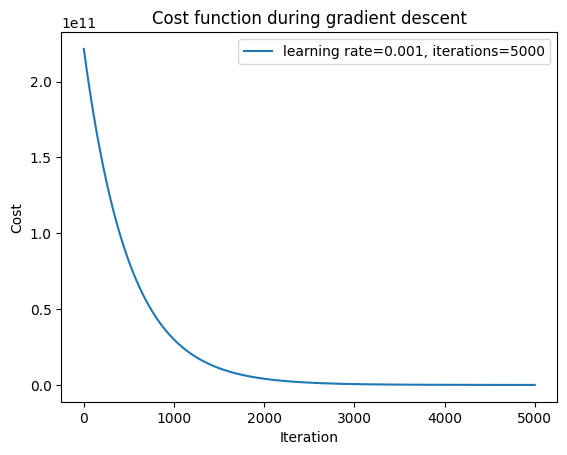

In [7]:
plt.plot(cost_history, label=f'learning rate={alpha}, iterations={iterations}')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function during gradient descent')
plt.legend()
plt.show()

Once we are confident that gradient descent has found us our optimal parameter values we then use the test data to see how close our predictions are.

In [8]:
test_df_scaled = z_score_scaling(test_df, training_standard_deviation ,training_mean)
predicted_targets = compute_predictions(test_df_scaled, b_final, w_final)

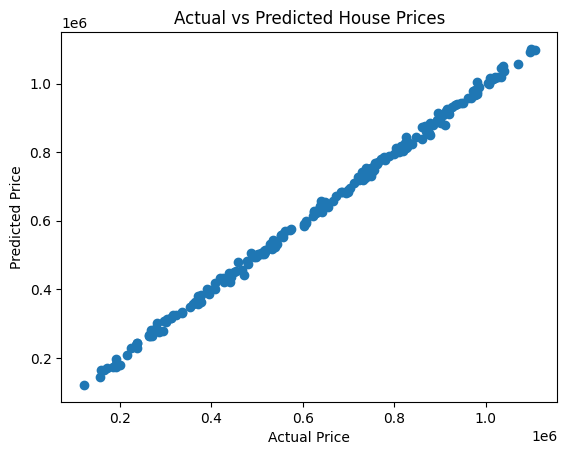

In [9]:
plt.scatter(actual_targets, predicted_targets)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

From the figure above we can see that our model seems to preform pretty well on test data. We can quantify how well it preforms using coefficient of determination which is a statistical measure that represents the proportion of the variance for a dependent variable that is captured by our model.

In [10]:
r_squared = compute_r_squared(actual_targets, predicted_targets, training_mean)
print(f"Coefficient of determination= {r_squared}")

Coefficient of determination= 0.9985155667331368
